In [5]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

%load_ext autoreload
%autoreload 2

from tqdm import tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial, signal
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
from IPython.display import display, HTML
import pandas as pd
import pickle
import re
from scanf import scanf

import matplotlib
# matplotlib.use('agg')
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from tqdm.notebook import tqdm as tqdm_notebook
from tqdm import tqdm
from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb

# %matplotlib notebook
%matplotlib inline
rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


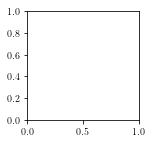

In [6]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [7]:
job_dir = 'ecoC01B05_wt2_psi_rada'

t_headle = '(.*?).pickle'

In [8]:
n_load = 10000
rand_mode=False

t_dir = os.path.join(PWD, job_dir)
_ = spf_tb.load_rand_data_pickle_dir_v2(t_dir, t_headle, n_load=n_load, rand_mode=rand_mode)
ini_theta_list, ini_phi_list, ini_psi_list, std_eta_list, psi_max_phi_list, \
theta_autocorrelate_fre_list, phi_autocorrelate_fre_list, psi_autocorrelate_fre_list, \
eta_autocorrelate_fre_list, dx_list, dy_list, dz_list, pickle_path_list = _

In [9]:
t_name = os.path.join(os.getcwd(), 'ecoC01B05_phase_Peclet', '%s.pickle' % job_dir)
with open(t_name, 'wb') as handle:    
    pickle.dump(_, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('save to %s' % t_name)

save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_phase_Peclet/ecoC01B05_wt2_psi_rada.pickle


In [10]:
n_load = 10000
rand_mode=False

t_dir = os.path.join(PWD, job_dir)
_ = spf_tb.load_rand_data_pickle_dir_instant(t_dir, t_headle, n_load=n_load, rand_mode=rand_mode, 
                                             t_step=10)
pickle_path_list, idx_list, intp_t, intp_X_list = _

In [13]:
# intp_X_list = np.dstack(np.dstack(intp_X_list))

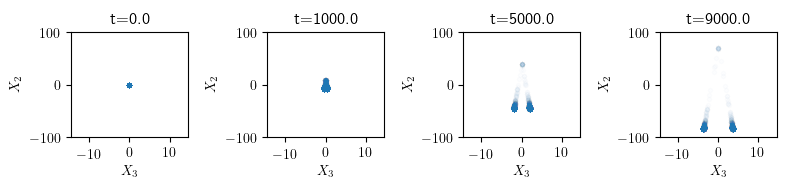

In [14]:
figsize = np.array((8, 2)) * 1
dpi = 100
use_Tidx_list = [0, 100, 500, 900]
# x_lim = [intp_X_list[:, 2, :].min(), intp_X_list[:, 2, :].max()]
# y_lim = [intp_X_list[:, 1, :].min(), intp_X_list[:, 1, :].max()]
x_lim = [-14.5, 14.5]
y_lim = [-100, 100]

# fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
# fig.patch.set_facecolor('white')
# for intp_X in intp_X_list:
#     axi.plot(intp_t, intp_X[:, 1])

fig_nrow = 1
fig_ncol = int(np.ceil(len(use_Tidx_list) / fig_nrow))
fig, axs = plt.subplots(fig_nrow, fig_ncol, figsize=figsize, dpi=dpi)
fig.patch.set_facecolor('white')
for axi, use_Tidx in zip(axs.ravel(), use_Tidx_list):
    tx = intp_X_list[use_Tidx, 2, :]
    ty = intp_X_list[use_Tidx, 1, :]
    axi.plot(tx, ty, '.', alpha=0.01)
    axi.set_title('t=%.1f' % intp_t[use_Tidx])
    axi.set_xlim(*x_lim)
    axi.set_ylim(*y_lim)
    axi.set_xlabel('$X_3$')
    axi.set_ylabel('$X_2$')

plt.tight_layout()

[[   0    1    2    3    4    5    6]
 [   1    3   16 5422    1 4556    1]]

0 1 0.5998245822768867 0.24769843748511006
1 3 0.9926227364755436 9.14155923286907e-11
2 16 0.031158871945479675 0.03631509635164466
3 5422 0.9926227364732761 1.4577154060180888e-13
4 1 0.9926227364732547 3.771139484754897e-14
5 4556 0.9926227364732769 4.1289252464434855e-14
6 1 0.9926227364732577 2.6616856625075858e-14


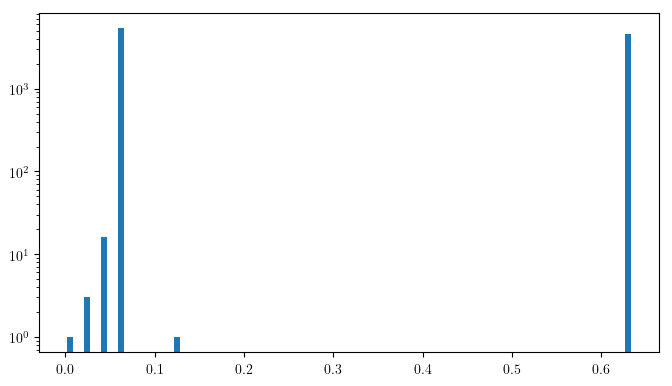

In [15]:
n_hist = 100
figsize = np.array((16, 9)) * 0.5
dpi = 100
# use_autocorrelate_fre_list = theta_autocorrelate_fre_list
# use_autocorrelate_fre_list = phi_autocorrelate_fre_list
use_autocorrelate_fre_list = eta_autocorrelate_fre_list

tmax_fre_list = np.hstack([t1[0, 0] for t1 in use_autocorrelate_fre_list])
# tmax_fre_list = tmax_fre_list[tmax_fre_list < 0.04]
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
t1 = axi.hist(tmax_fre_list, n_hist)
axi.set_yscale('log')

bin_edges = np.histogram_bin_edges(tmax_fre_list, n_hist)
case_idx0 = np.digitize(tmax_fre_list, bin_edges)
case_idx = np.ones_like(case_idx0) * -1
for i1, i0 in enumerate(np.unique(case_idx0)):
    tidx = np.isclose(case_idx0, i0)
    case_idx[tidx] = i1
assert np.all(case_idx >= 0)
print(np.vstack((np.unique(case_idx), np.bincount(case_idx))))
print()

for use_case, n_case in zip(np.unique(case_idx), np.bincount(case_idx)):
    tidx = np.isclose(case_idx, use_case)
    # np.mean(psi_max_phi_list[tidx][psi_max_phi_list[tidx] > np.pi])
    print(use_case, n_case, np.mean(std_eta_list[tidx][:, 0] / np.pi), (std_eta_list[tidx][:, 1] / np.pi).max())

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt2_psi_rada/th1.600_ph1.684_ps3.265_D20200512_T215435.pickle


/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


True

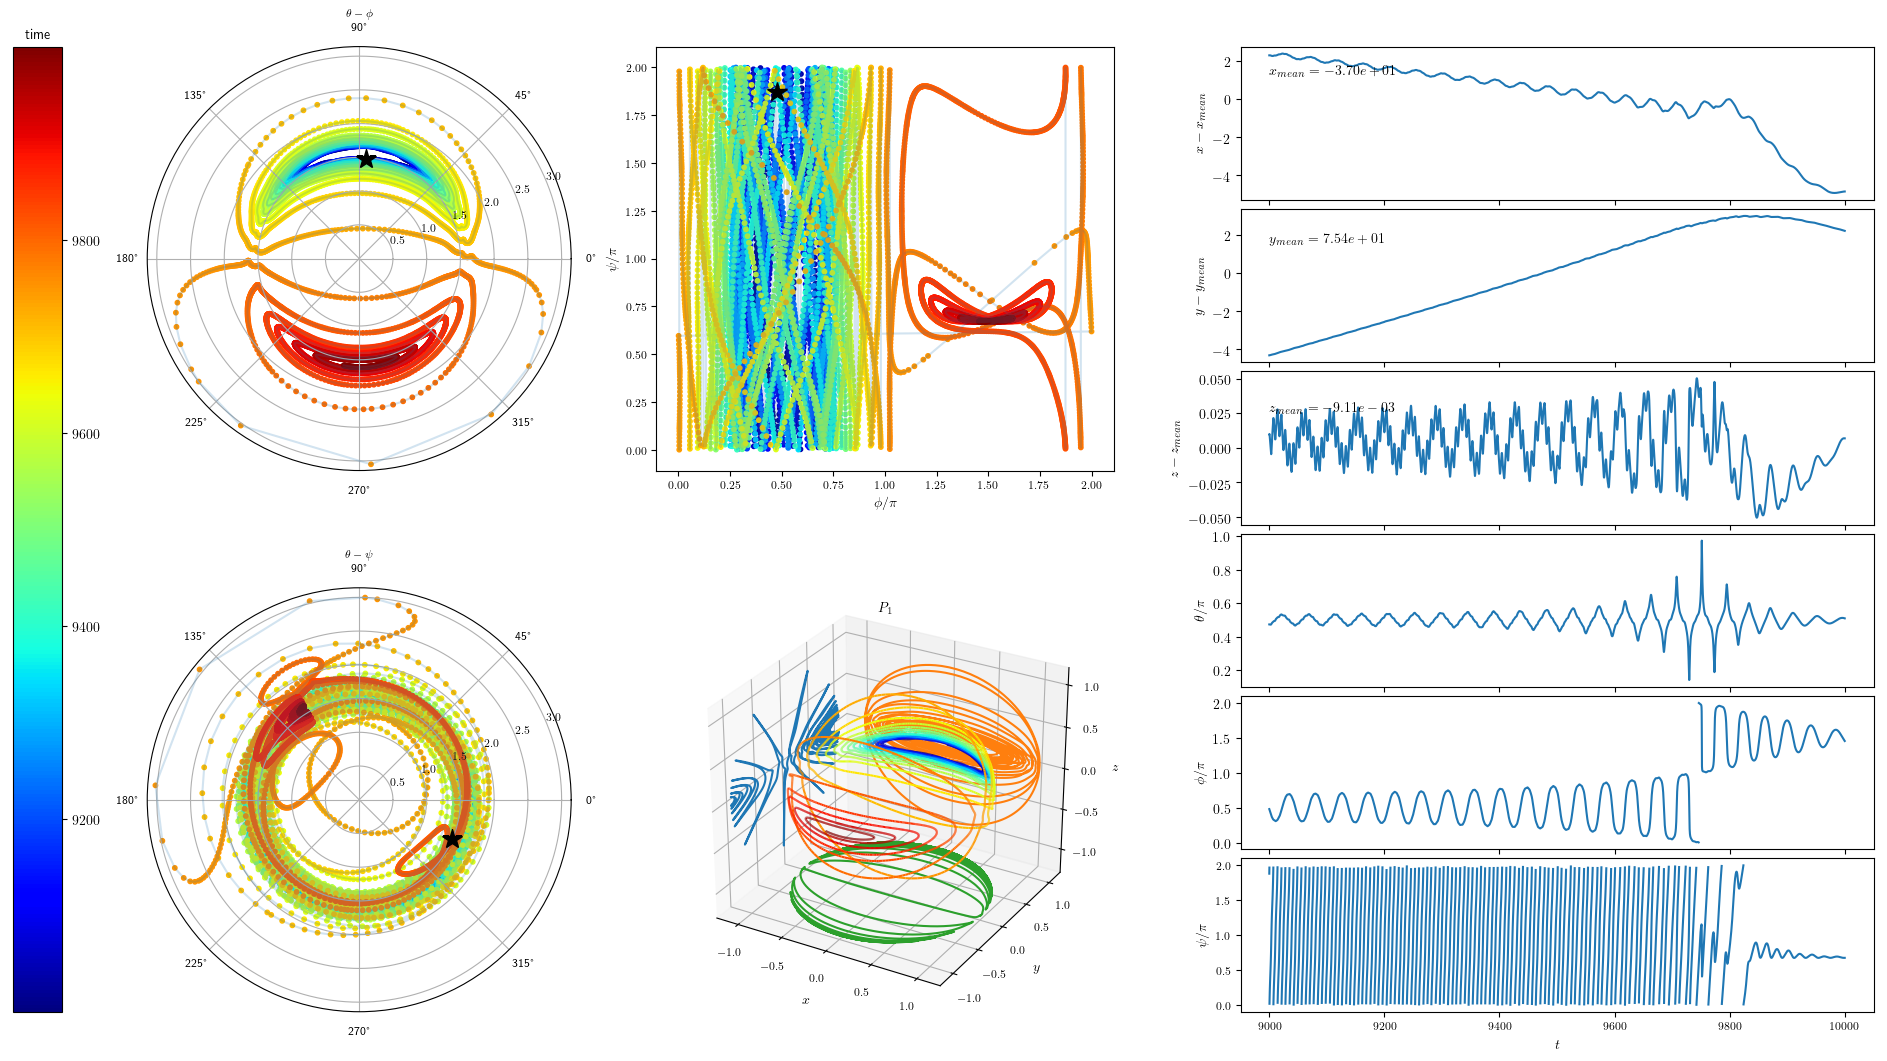

In [16]:
tidx = np.isclose(case_idx, 0)
tpath = pickle_path_list[tidx][0]

with open(tpath, 'rb') as handle:
    tpick = pickle.load(handle)
Table_t = tpick['Table_t']
Table_dt = tpick['Table_dt']
Table_X = tpick['Table_X']
Table_P = tpick['Table_P']
Table_P2 = tpick['Table_P2']
Table_theta = tpick['Table_theta']
Table_phi = tpick['Table_phi']
Table_psi = tpick['Table_psi']
Table_eta = tpick['Table_eta']
idx = Table_t > 9000
print(tpath)
spf_tb.show_table_result_v2(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                            Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx])

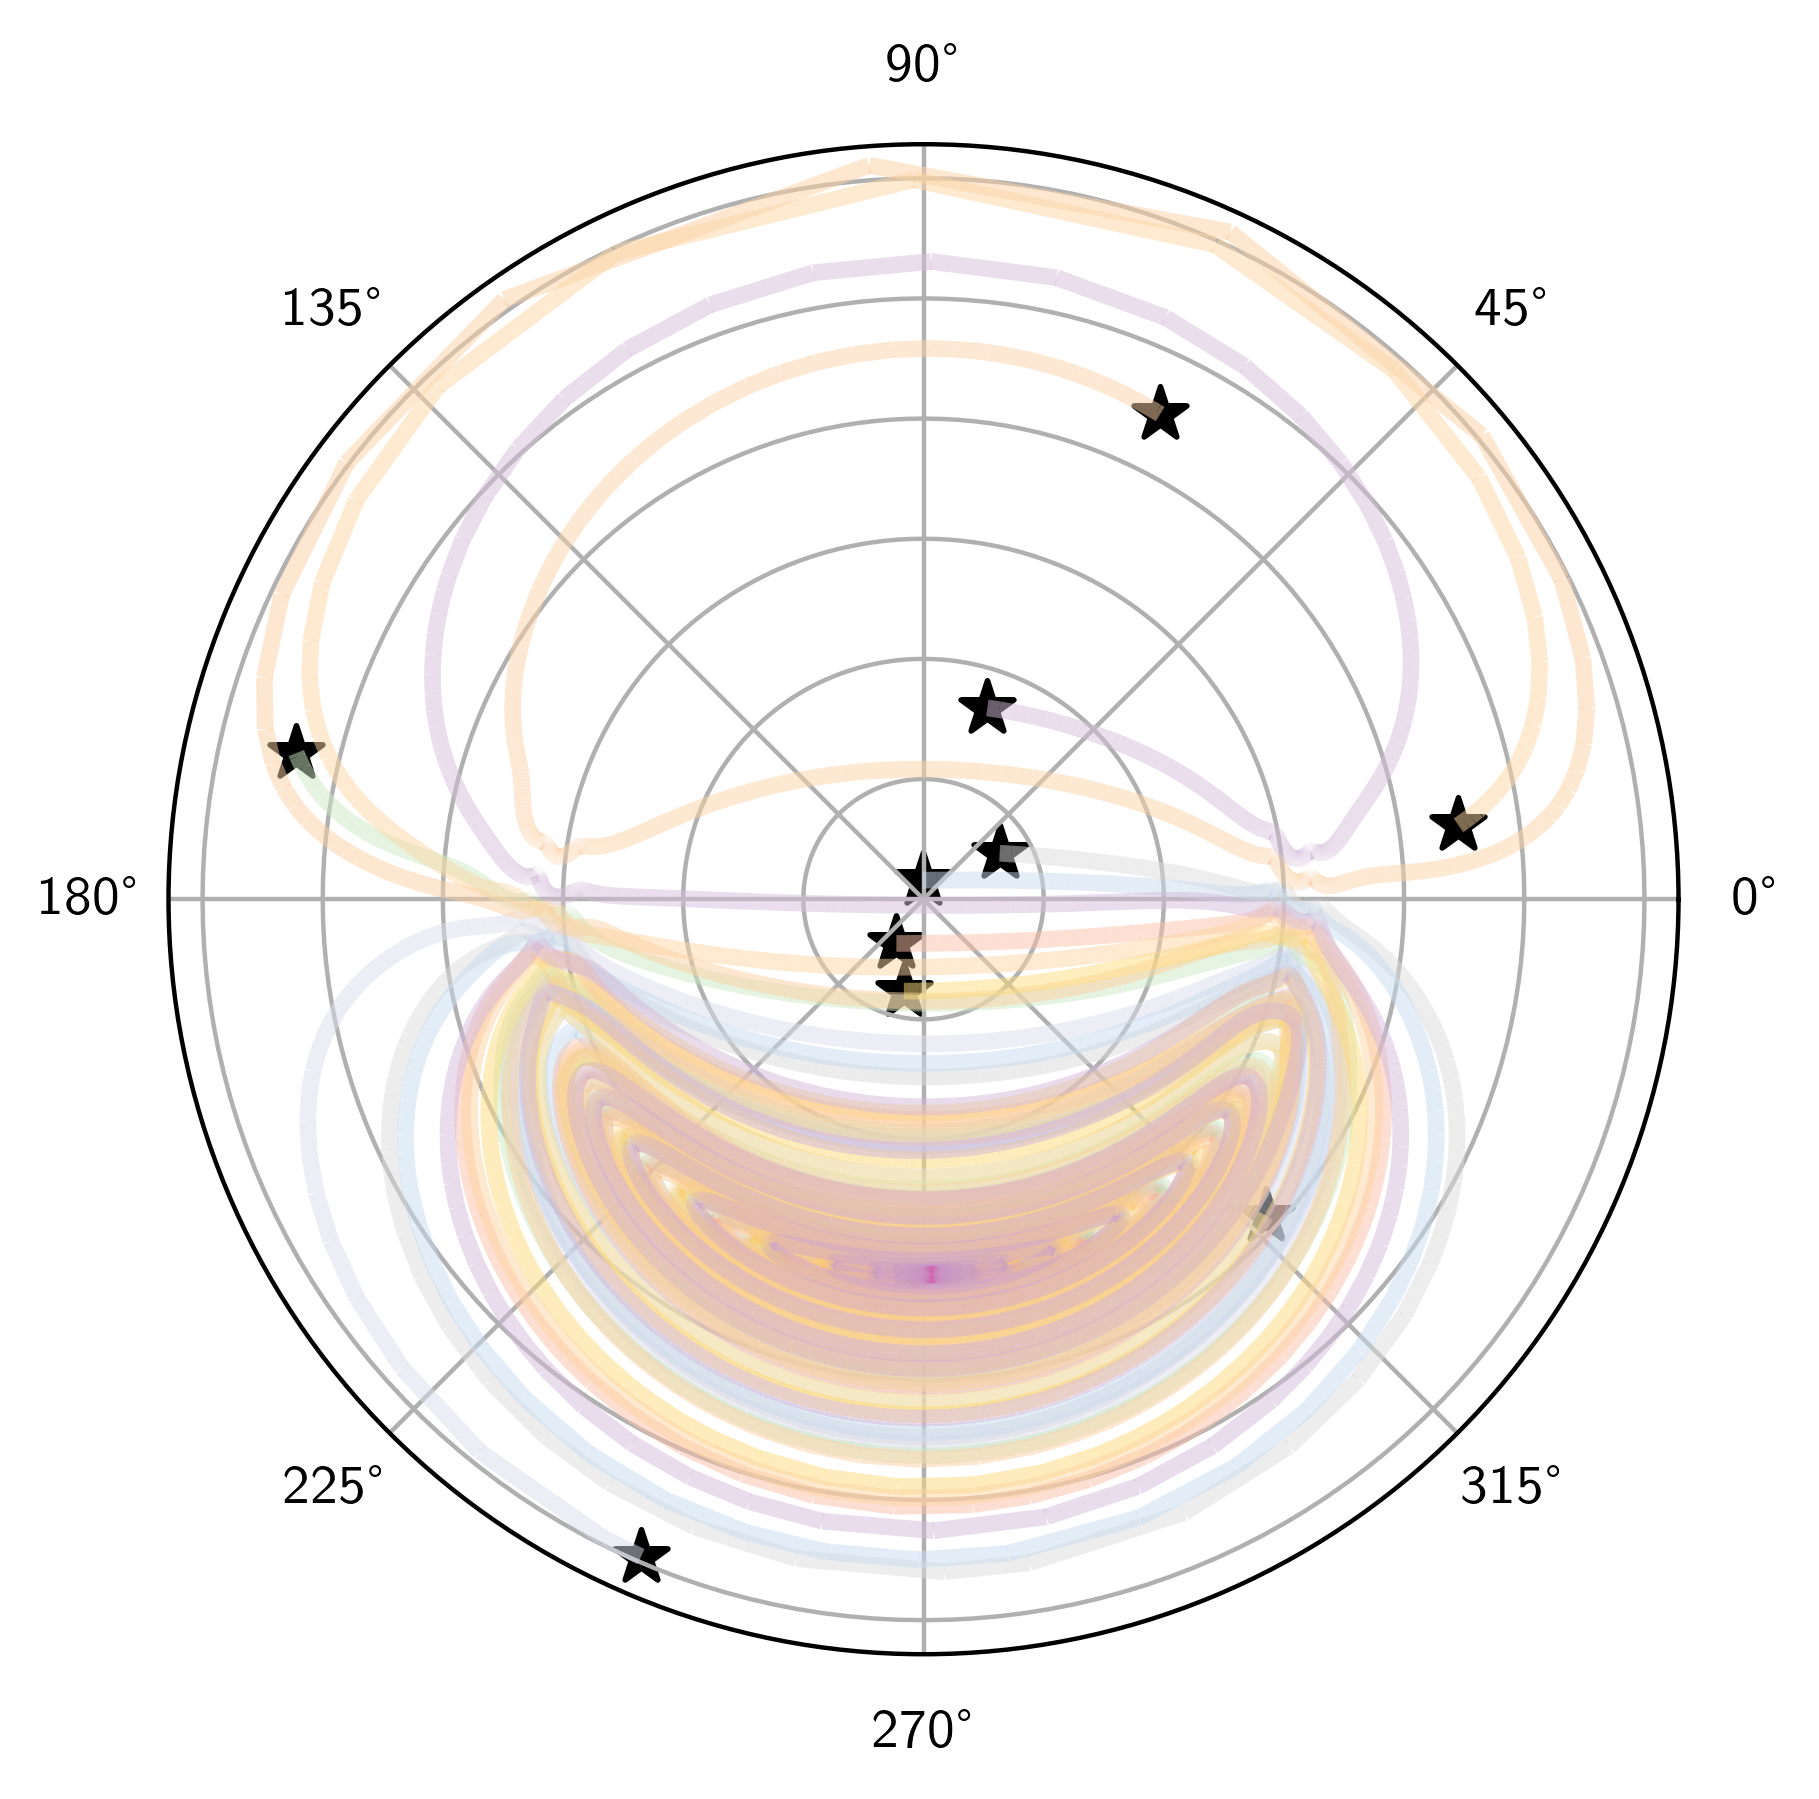

In [17]:
figsize=np.array((5, 5))
dpi=400
tidx = np.isclose(case_idx, 3)

sub_idx = np.random.choice(np.sum(tidx), 10, replace=False)
fig = spf_tb.show_pickle_theta_phi_list(pickle_path_list[tidx][sub_idx], figsize=figsize, dpi=dpi, 
                                        fast_mode=0, markersize=100, linewidth=3, 
                                        Table_t_range=(0, 3000))

In [ ]:
# tidx = np.isclose(case_idx, 0)
# tidx = np.isclose(case_idx, 2)
tidx = np.isclose(case_idx, 3)


figsize = np.array((16, 9)) * 0.5
dpi = 100
fig, axs = plt.subplots(2, 2, figsize=figsize, dpi=dpi)
for axi, use_autocorrelate_fre_list in zip(axs.ravel(), (theta_autocorrelate_fre_list, phi_autocorrelate_fre_list, 
                                                         psi_autocorrelate_fre_list, eta_autocorrelate_fre_list)):
    t1 = use_autocorrelate_fre_list[tidx][:, 0]
    t2 = use_autocorrelate_fre_list[tidx][:, 1][t1[:, 0] / t1[:, 1] > 1]
    print(axi.hist(t1[:, 0] / t1[:, 1], 10, log=True, ))
# print(plt.hist(dy_list[tidx], 10, log=True, ))
print('%d, %.4f, %.4f, %.4f±%.2e' % (tidx.sum(), dy_list[tidx].max(), dy_list[tidx].min(), 
                                      dy_list[tidx].mean(), dy_list[tidx].std()))
print('%d, %.4e, %.4e, %.4e±%.2e' % (tidx.sum(), dz_list[tidx].max(), dz_list[tidx].min(), 
                                      dz_list[tidx].mean(), dz_list[tidx].std()))
if t2.size > 0:
    tpct = (t2[:, 1] / t2[:, 0]).max()
else:
    tpct = 0
print('%.4f±%.4f, %f' % (np.mean(std_eta_list[tidx][:, 0] / np.pi), (std_eta_list[tidx][:, 1] / np.pi).max(), tpct))

In [ ]:
t1 = use_autocorrelate_fre_list[tidx][:, 0]
t2 = use_autocorrelate_fre_list[tidx][:, 1]
plt.semilogy(t1[:, 0] / t1[:, 1], t2[:, 1] / t2[:, 0], '.')

In [ ]:
use_autocorrelate_fre_list = phi_autocorrelate_fre_list
# use_autocorrelate_fre_list = eta_autocorrelate_fre_list
# tidx = np.isclose(case_idx, 2)
# tidx = np.isclose(case_idx, 0)
tidx = np.isclose(case_idx, 3)

t1 = use_autocorrelate_fre_list[tidx][:, 0]
t2 = use_autocorrelate_fre_list[tidx][:, 1][t1[:, 0] / t1[:, 1] > 1]
print(plt.hist(t1[:, 0] / t1[:, 1], 10, log=True, ))
print('%d, %.4f, %.4f, %.4f±%.2e' % (tidx.sum(), dy_list[tidx].max(), dy_list[tidx].min(), 
                                      dy_list[tidx].mean(), dy_list[tidx].std()))
if t2.size > 0:
    tpct = (t2[:, 1] / t2[:, 0]).max()
else:
    tpct = 0
print('%.4f±%.4f, %f' % (np.mean(std_eta_list[tidx][:, 0] / np.pi), (std_eta_list[tidx][:, 1] / np.pi).max(), tpct))

In [ ]:
use_case = 5
tidx = np.isclose(case_idx, use_case)
plt.hist(std_eta_list[tidx][:, 0] / np.pi)

In [58]:
dy_list.max()

0.006499517236414144

In [20]:
from shutil import copyfile

title_handle = 'model 2, elliptical helix tail, $\\omega=2$'
case_info_list = [('e', np.isclose(case_idx, 3)), ]

for trj_handle, tidx0 in case_info_list:
    for i0 in range(5): 
        suptitle = '%s, %s, case %2d' % (title_handle, trj_handle, i0)
        tpath = pickle_path_list[tidx0][i0]
#         print(tpath)
        tname0 = '%s_%s_%02d' % (job_dir, trj_handle, i0)
        tname = os.path.join(os.getcwd(), 'orintation', '%s.pickle' % tname0)
        copyfile(tpath, tname)
        tname = os.path.join(os.getcwd(), 'orintation', '%s.mat' % tname0)
        with open(tpath, 'rb') as handle:
            tpick = pickle.load(handle)
            savemat(tname, mdict={'tpick': tpick})
        print('save to %s' % tname)

save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt2_psi_rada_e_00.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt2_psi_rada_e_01.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt2_psi_rada_e_02.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt2_psi_rada_e_03.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt2_psi_rada_e_04.mat
